In [ ]:
EXPLORATORY DATA ANALYSIS ON DATASET-TERRORISM

import libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os 
import mpl_toolkits
import json

read the libraries

In [16]:
# Storing Data in DataFrame
df_terrorism= pd.read_csv("/content/terrorism.csv",encoding='latin1')

In [21]:
df_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


cleaning the dataframe

In [22]:
# Dimensions of the DataFrame
df_terrorism.shape

(48289, 135)

In [23]:
# Selecting Wanted columns
usecols = [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamecols = {
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': u'year',
    'country_txt': u'country',
    'region_txt': u'region',
    'provstate': u'state',
    'attacktype1_txt': u'attacktype',
    'targtype1_txt': u'targettype',
    'weaptype1_txt': u'weapontype',
    'nperps': u'nter',
    'nkill': u'nkilled',
    'nkillter': u'nkilledter',
    'nwound': u'nwounded',
    'nwoundte': u'nwoundedter',
    'propextent_txt': u'propertyextent'
}

In [27]:
df_terrorism= pd.read_csv("/content/terrorism.csv",encoding='latin1',usecols=usecols)
df_terrorism.rename(columns=renamecols, inplace=True)
df_terrorism = df_terrorism.apply(lambda x: x.encode('utf-8').strip() if isinstance(x, str) else x)

In [28]:
df_terrorism.shape

(48289, 23)

In [29]:
df_terrorism.head()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0.0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1.0,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1.0,NaN


In [30]:
# Removing unknown values in the coordinates
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lat)]
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lon)]
print("Unknown values in the coordinates are removed succcessfully")

Unknown values in the coordinates are removed succcessfully


In [31]:
# Unknowns in numeric columns
exclude_cols = ['year', 'lat', 'lon']
float_cols = [c for c in df_terrorism.select_dtypes(include=[float]).columns.tolist() if c not in exclude_cols]

In [32]:
df_terrorism[float_cols] = df_terrorism[float_cols].fillna(0).astype(int)
df_terrorism[float_cols] = df_terrorism[float_cols].mask(df_terrorism[float_cols] < 0, 0)

In [33]:
# Unknowns in string columns
str_cols = df_terrorism.select_dtypes(exclude=[float]).columns.tolist()
df_terrorism[str_cols] = df_terrorism[str_cols].fillna('Unknown')
# Many fields are dots which mean unknown value
df_terrorism[str_cols] = df_terrorism[str_cols].replace(r'^\.*$', 'Unknown', regex=True)

In [34]:
# Limit Long strings
df_terrorism['weapontype'] = df_terrorism['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Minor (likely < $1 million)', u'Minor (< $1 million)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Major (likely > $1 million but < $1 billion)', u'Major (< $1 billion)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Catastrophic (likely > $1 billion)', u'Catastrophic (> $1 billion)')

In [35]:
# Number of duplicates values
df_terrorism.duplicated().sum()

8433

In [36]:
# Removal of duplicates values
df_terrorism.drop_duplicates(keep=False,inplace=True)

In [37]:
# No more null values
df_terrorism.isnull().sum()

year              0
extended          0
country           0
region            0
state             0
city              0
lat               0
lon               0
multiple          0
success           0
suicide           0
attacktype        0
targettype        0
gname             0
nter              0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundedter       0
property          0
propertyextent    0
dtype: int64

In [38]:
print("Total Number of Null Values = ",df_terrorism.isnull().sum().sum())

Total Number of Null Values =  0


In [39]:
# Shape of Processed dataset
df_terrorism

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48232,1991,0,Nicaragua,Central America & Caribbean,Leon,El Sauce,12.870545,-86.542320,0,1,...,Recontras,20,0,Firearms,1,0,1,0,1,Unknown
48233,1991,1,India,South Asia,Jammu and Kashmir,Srinagar,34.083740,74.789902,0,1,...,Al-Umar Mujahideen,0,0,Firearms,0,0,0,0,0,Unknown
48234,1991,0,Argentina,South America,Buenos Aires,Buenos Aires,-34.617680,-58.444435,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
48241,1991,0,Indonesia,Southeast Asia,East Java,Surabaya,-7.289166,112.734398,0,1,...,Unknown,0,0,Unknown,0,0,0,0,1,Unknown


In [40]:
df_terrorism.shape

(33860, 23)

Exploratory Data Analysis

In [41]:
# Columns in the Dataset
df_terrorism.columns

Index(['year', 'extended', 'country', 'region', 'state', 'city', 'lat', 'lon',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype', 'gname',
       'nter', 'claimed', 'weapontype', 'nkilled', 'nkilledter', 'nwounded',
       'nwoundedter', 'property', 'propertyextent'],
      dtype='object')

In [42]:
# Datatypes in the Dataframe
df_terrorism.dtypes

year                int64
extended            int64
country            object
region             object
state              object
city               object
lat               float64
lon               float64
multiple            int64
success             int64
suicide             int64
attacktype         object
targettype         object
gname              object
nter                int64
claimed             int64
weapontype         object
nkilled             int64
nkilledter          int64
nwounded            int64
nwoundedter         int64
property            int64
propertyextent     object
dtype: object

In [43]:
df_terrorism.head()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown


In [44]:
df_terrorism.tail()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
48232,1991,0,Nicaragua,Central America & Caribbean,Leon,El Sauce,12.870545,-86.542320,0,1,...,Recontras,20,0,Firearms,1,0,1,0,1,Unknown
48233,1991,1,India,South Asia,Jammu and Kashmir,Srinagar,34.083740,74.789902,0,1,...,Al-Umar Mujahideen,0,0,Firearms,0,0,0,0,0,Unknown
48234,1991,0,Argentina,South America,Buenos Aires,Buenos Aires,-34.617680,-58.444435,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
48241,1991,0,Indonesia,Southeast Asia,East Java,Surabaya,-7.289166,112.734398,0,1,...,Unknown,0,0,Unknown,0,0,0,0,1,Unknown
48288,1991,0,Peru,South America,Lima,Lima,-11.967368,-76.978462,1,1,...,Shining Path (SL),0,0,Explosives,0,0,0,0,0,Unknown


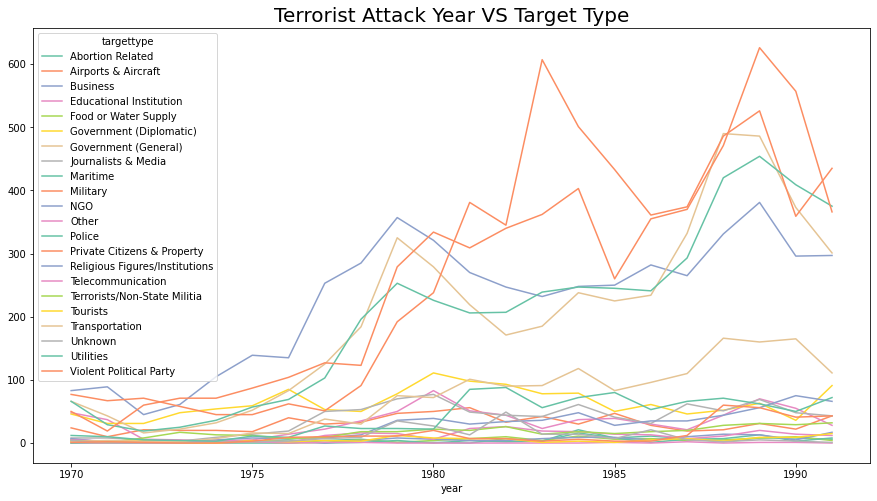

In [49]:
# Terrorist Attack Year VS Target Type
df_region=pd.crosstab(df_terrorism.year,df_terrorism.targettype)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Target Type", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

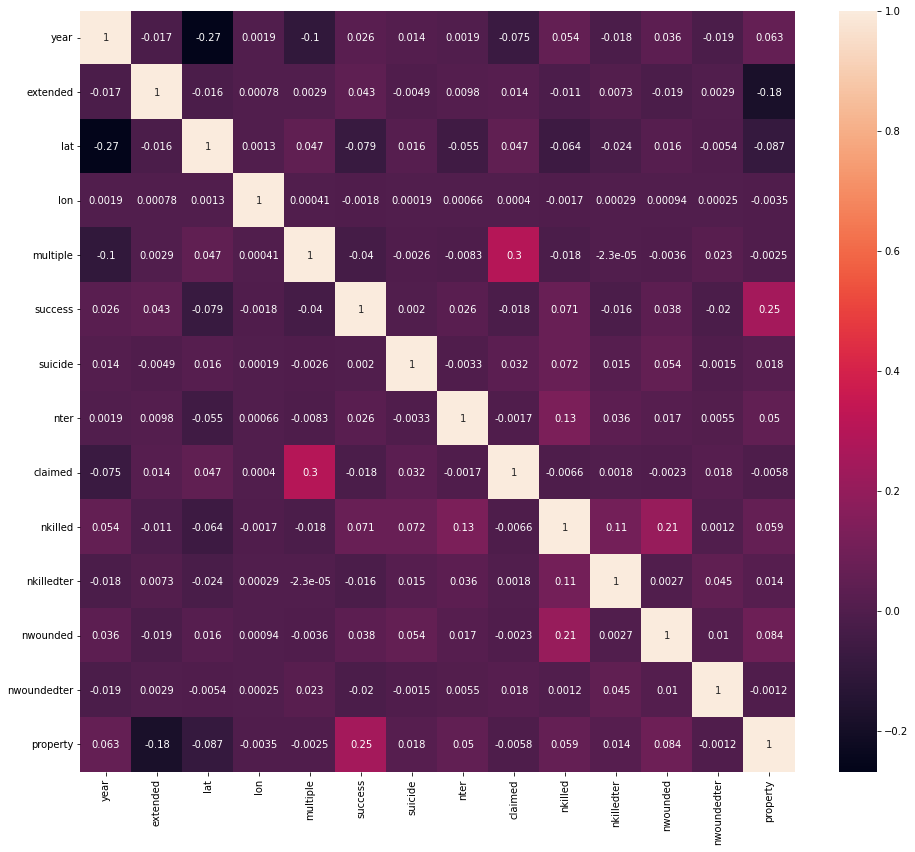

In [55]:


# Heat Map of the correlation among the columns
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.corr(), annot= True)
plt.show()

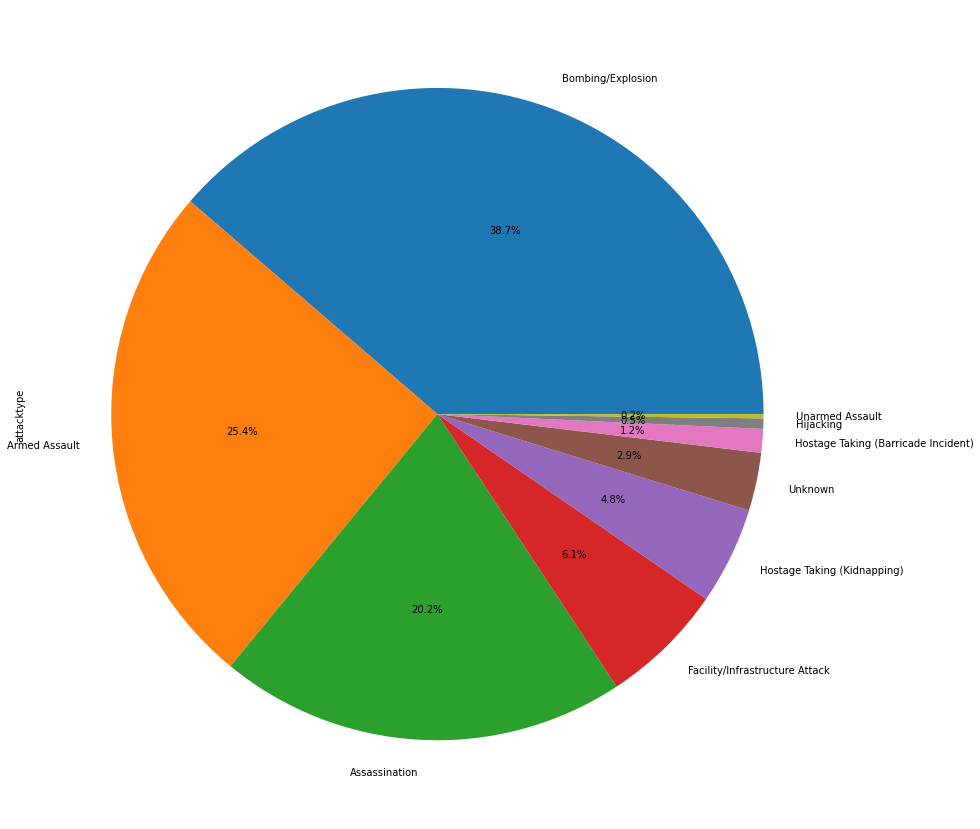

In [56]:
# Pie Plot of AttackTypes
plt.figure(figsize=(15,15))
df_terrorism['attacktype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

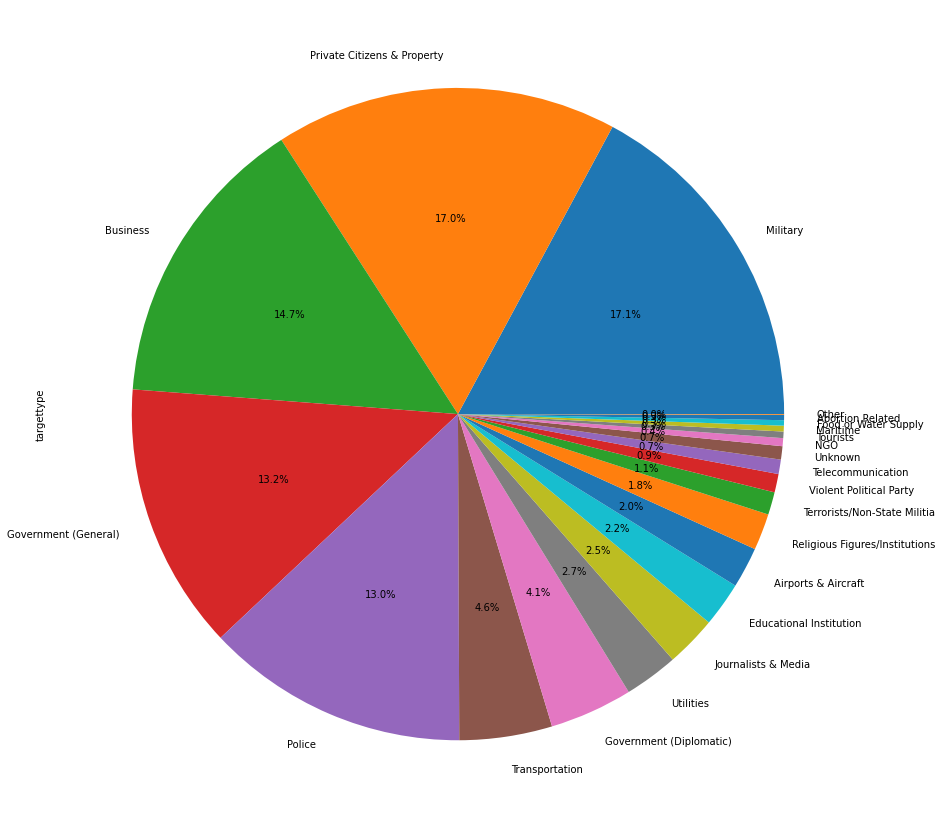

In [57]:
# Pie Plot of TargetTypes
plt.figure(figsize=(15,15))
df_terrorism['targettype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

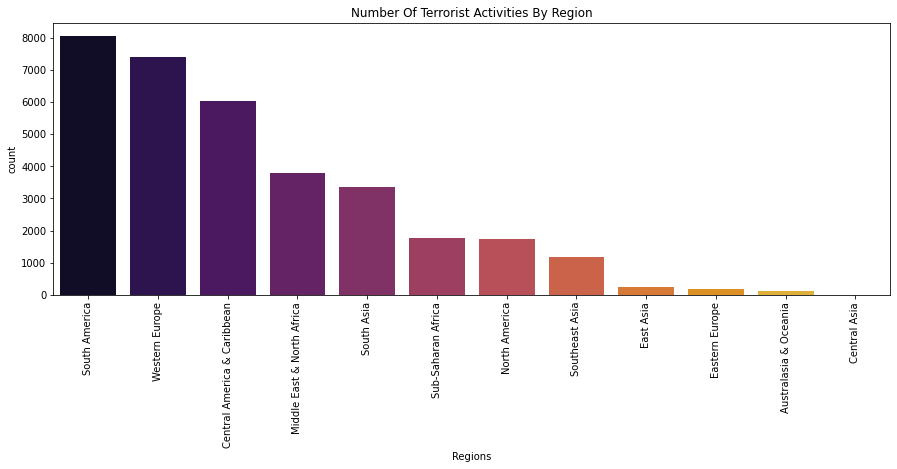

In [58]:
# Number of Terrorist Activities by Region
plt.subplots(figsize=(15,5))
sns.countplot('region',data=df_terrorism,palette='inferno',order=df_terrorism['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

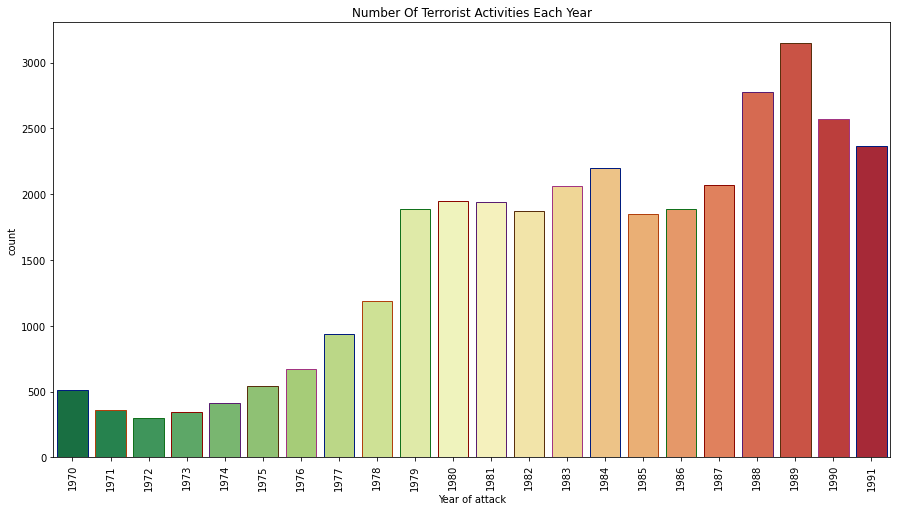

In [59]:
# Number of Terrorist Activities Each Year
plt.subplots(figsize=(15,8))
sns.countplot('year',data=df_terrorism,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Text(0.5, 1.0, 'Types of Weapons')

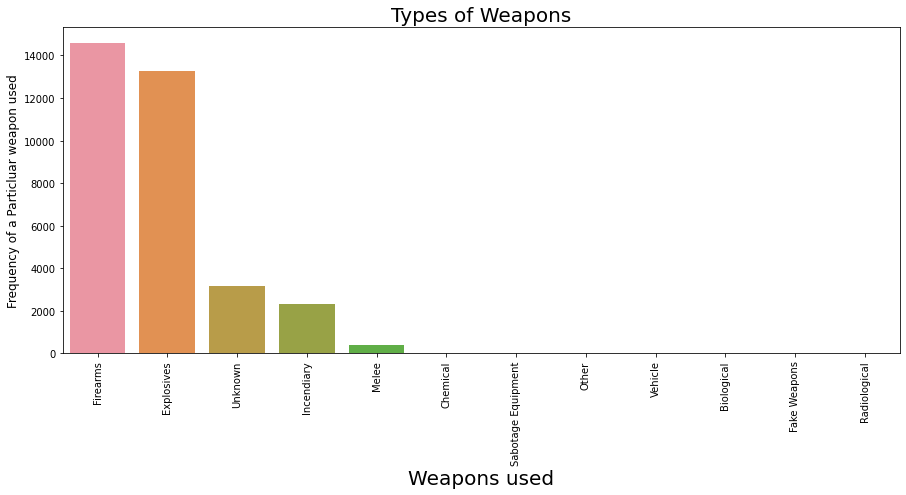

In [60]:
# Frequency of each weapon used
plt.figure(figsize=(15,6))
sns.barplot(x= df_terrorism["weapontype"].value_counts()[:50].index,y = df_terrorism["weapontype"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

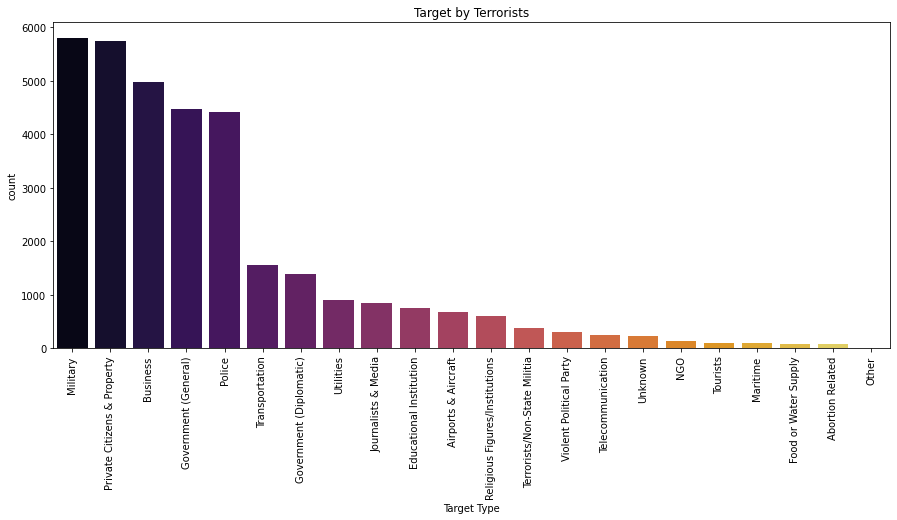

In [61]:
# Different Target places for Terrorists to Attack
plt.subplots(figsize=(15,6))
sns.countplot('targettype',data=df_terrorism,palette='inferno',order=df_terrorism['targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

Text(0, 0.5, 'Wounded')

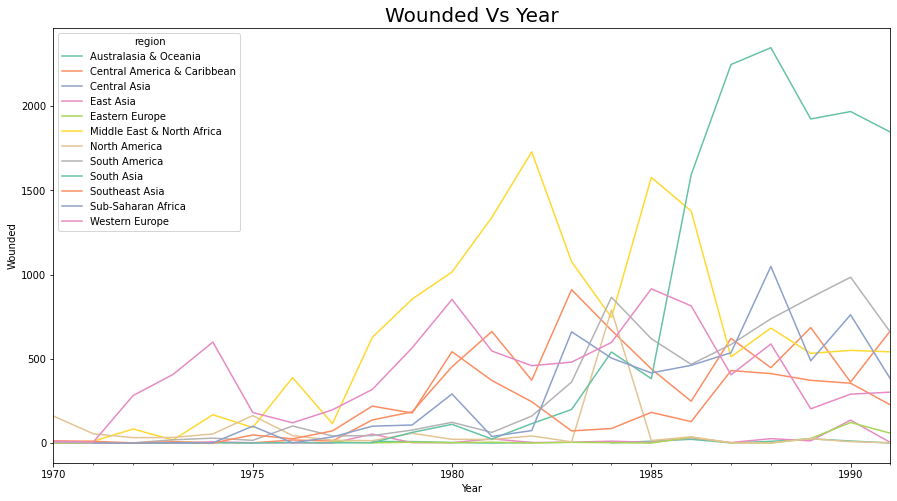

In [48]:
# Wounded VS Year
d=df_terrorism.groupby(['year','region'])['nwounded'].sum()
plot_df_terrorism = d.unstack('region').loc[:]
plot_df_terrorism.index = pd.PeriodIndex(plot_df_terrorism.index.tolist(),freq='A')
plot_df_terrorism.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.title("Wounded Vs Year", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Wounded")

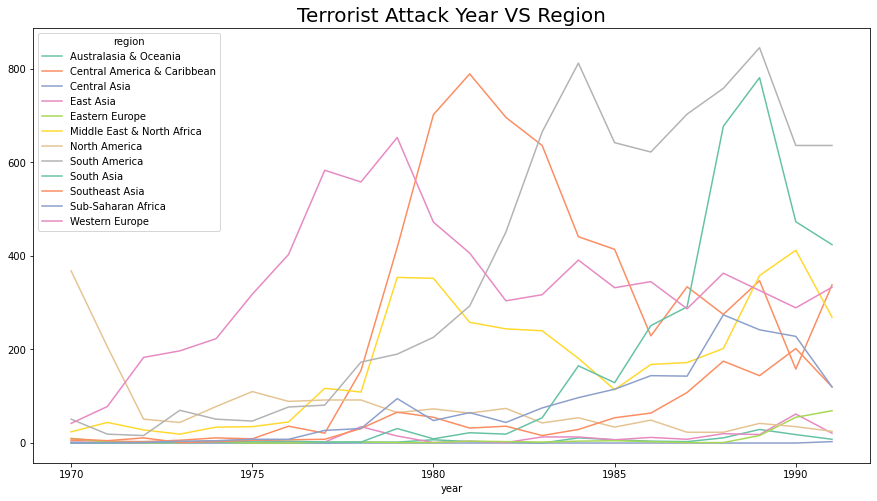

In [50]:
# Terrorist Attack Year VS Region
df_region=pd.crosstab(df_terrorism.year,df_terrorism.region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Region", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab95f3bb50>,
      dtype=object)

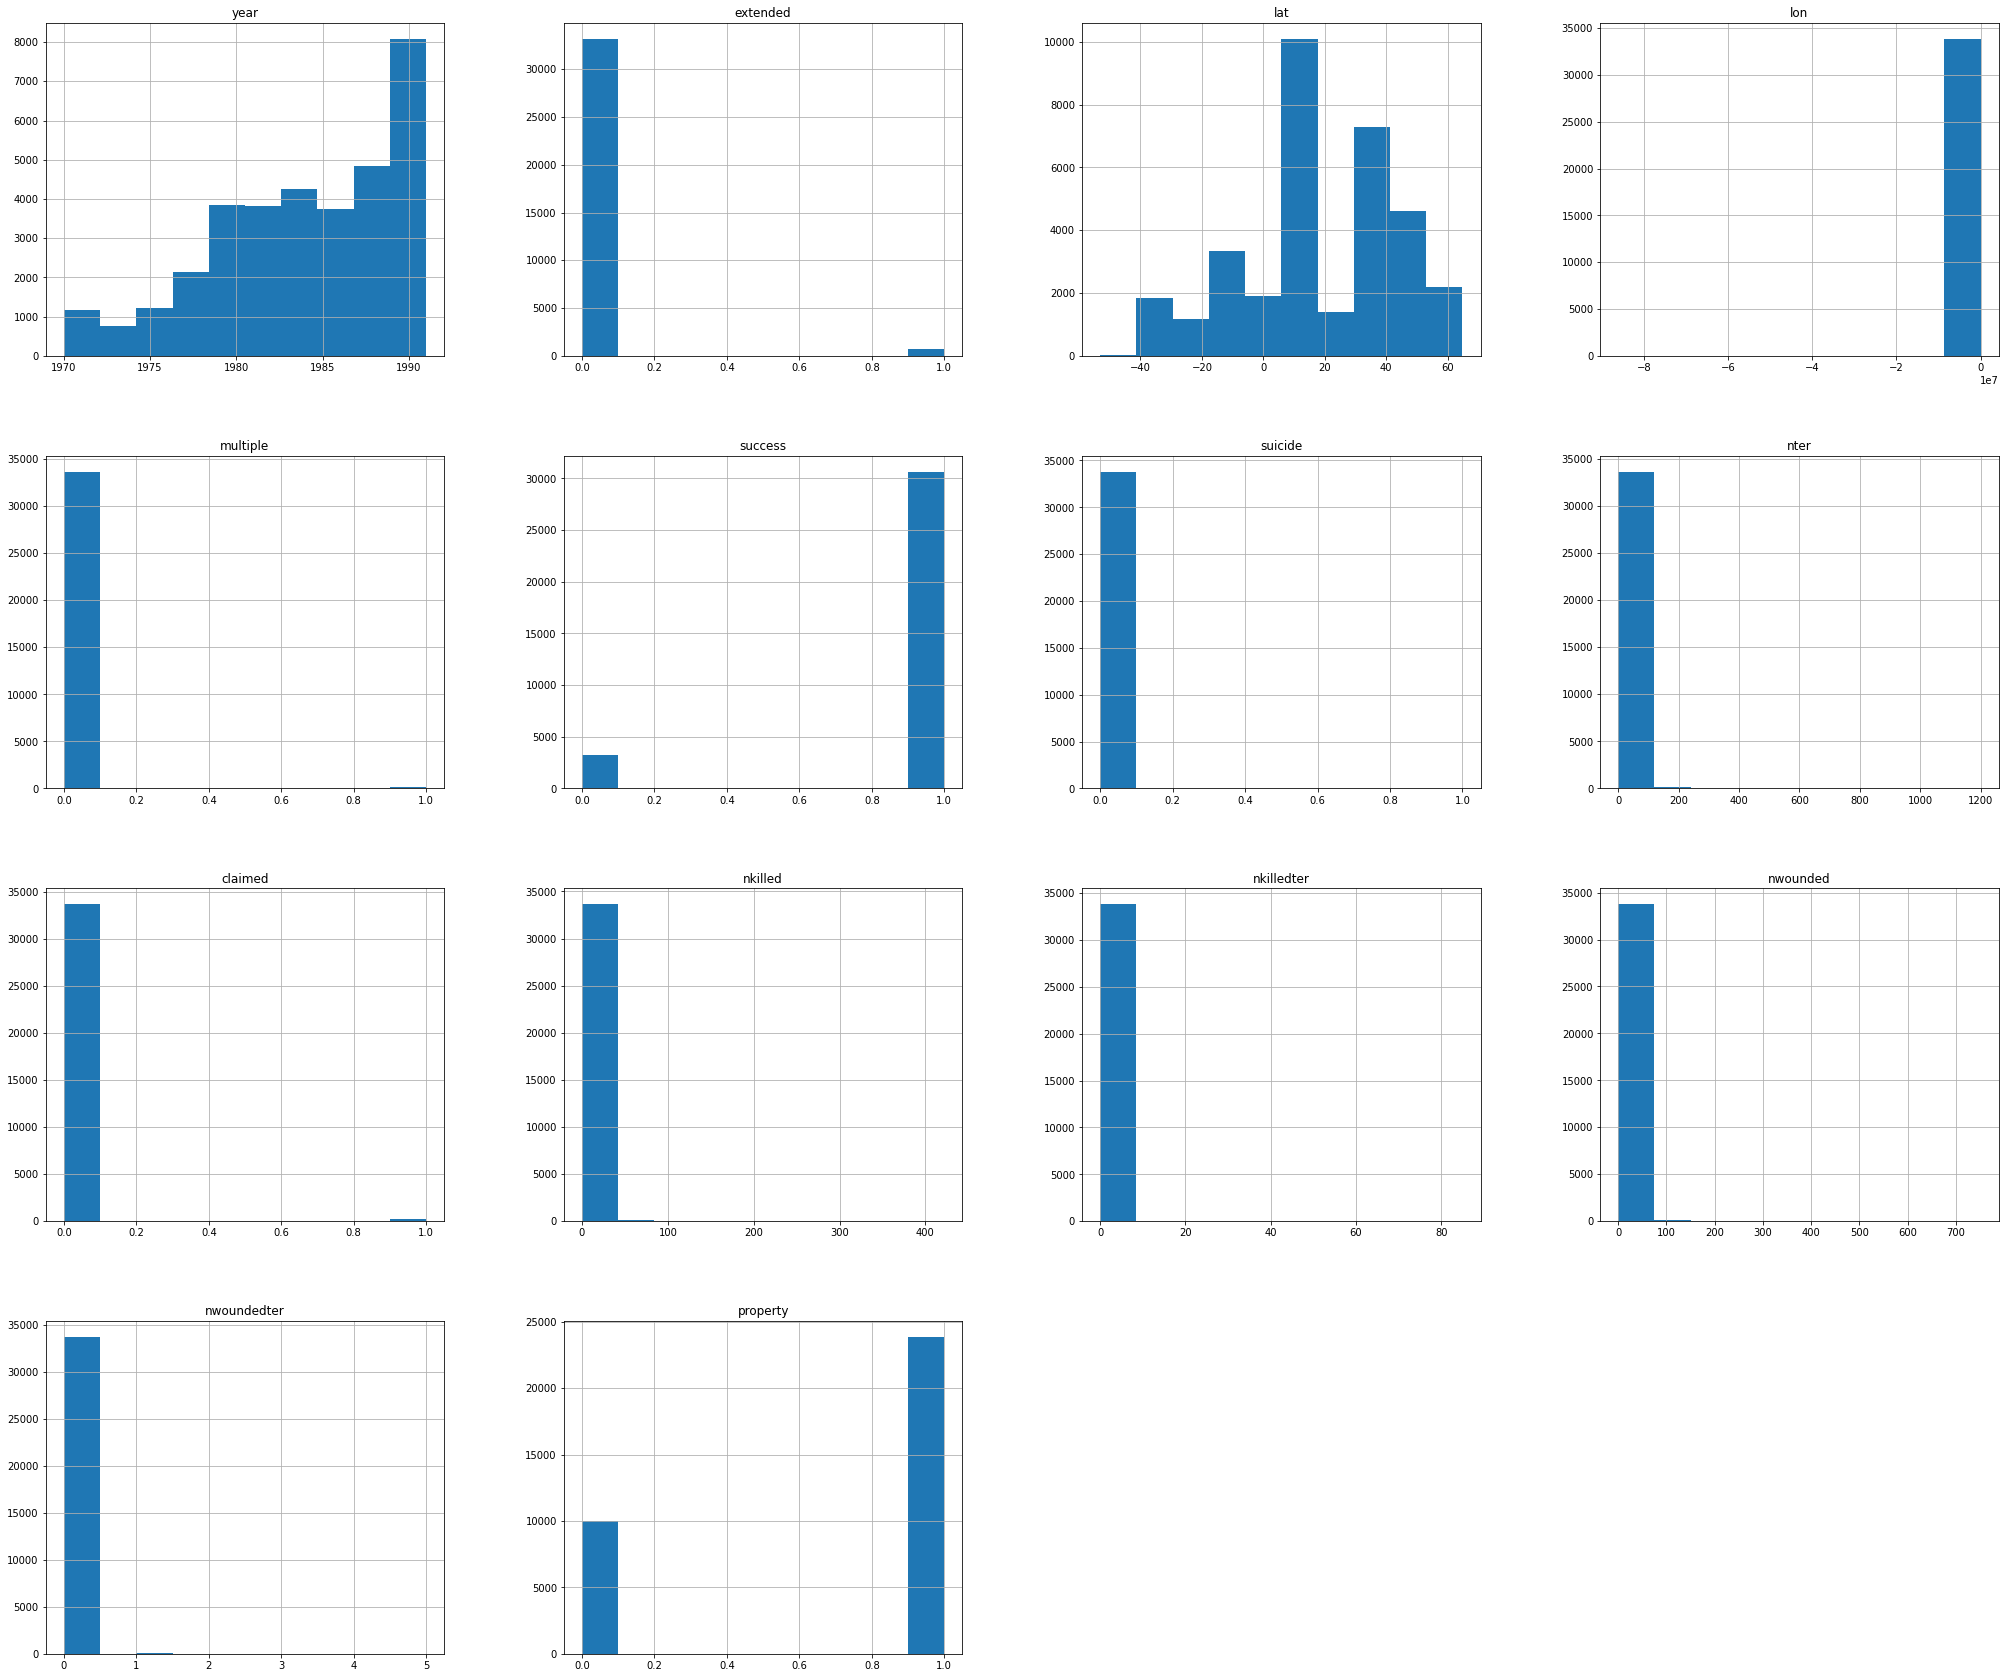

In [47]:
# Histogram of the Data
df_terrorism.hist(figsize=(35,30))

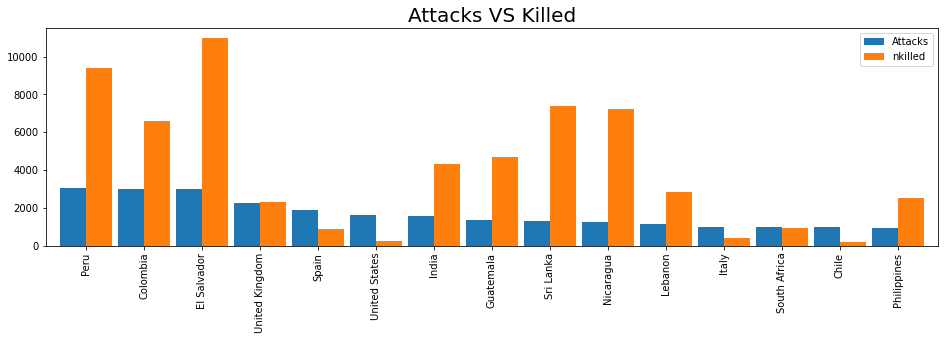

In [46]:
# Attacks VS Killed
count_terror = df_terrorism['country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df_terrorism.groupby ('country')['nkilled'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

end of the code.......
